Make sure to open in Colab to see the plots!

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 3.7 MB/s eta 0:00:00


In [ ]:
def plotseird(t, S, I, R, E=None, D=None, L=None, C=None, Q=None, R0=None, Alpha=None, Zeta=None, Beds=None, CFR=None):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'm', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  Total = S + I + R

  if E is not None:
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    Total = Total + E
  if D is not None:
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Deceased')
    Total = Total + D
  if C is not None:
    ax.plot(t, C, 'r', alpha=0.7, linewidth=2, label='Critical')
    Total = Total + C
  if Q is not None:
    ax.plot(t, Q, 'b--', alpha=0.7, linewidth=2, label='Quarantined')
    Total = Total + Q

  ax.plot(t, Total, 'c--', alpha=0.7, linewidth=2, label='Total')

  ax.set_xlabel('Time (days)')

  ax.title.set_text('Plot')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  if L is not None:
      plt.title("Lockdown after {} days".format(L))
  plt.show();

  if R0 is not None or CFR is not None:
    f = plt.figure(figsize=(12,4))

  if R0 is not None:
    # sp1
    ax1 = f.add_subplot(231)
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

    ax1.set_xlabel('Time (days)')
    ax1.title.set_text('R_0 over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    ax1.grid(visible=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Alpha is not None:
    # sp2
    ax2 = f.add_subplot(232)
    ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

    ax2.set_xlabel('Time (days)')
    ax2.title.set_text('fatality rate over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    ax2.grid(visible=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Zeta is not None:
    # sp3
    ax3 = f.add_subplot(234)
    ax3.plot(t, Zeta, 'g--', alpha=0.7, linewidth=2, label='zeta')

    ax3.set_xlabel('Time (days)')
    ax3.title.set_text('fatality rate over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax3.yaxis.set_tick_params(length=0)
    ax3.xaxis.set_tick_params(length=0)
    ax3.grid(visible=True, which='major', c='w', lw=2, ls='-')
    legend = ax3.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Beds is not None:
    # sp4
    ax4 = f.add_subplot(235)
    ax4.plot(t, Beds, 'g--', alpha=0.7, linewidth=2, label='beds')

    ax4.set_xlabel('Time (days)')
    ax4.title.set_text('fatality rate over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax4.yaxis.set_tick_params(length=0)
    ax4.xaxis.set_tick_params(length=0)
    ax4.grid(visible=True, which='major', c='w', lw=2, ls='-')
    legend = ax4.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

    plt.show();

## SIR

In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y

    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
N = 1_000_000
D = 8.0 # zaraza traje 4 dana
gamma = 1.0 / D # stopa oporavka
R_0 = 5.0 # temeljni reproduktivni broj
beta = R_0 * gamma  # stopa zaraze; R_0 = beta / gamma, dakle beta = R_0 * gamma
S0, I0, R0 = N-1, 1, 0  # početni uvjeti: jedna zarazna osoba

In [ ]:
t = np.linspace(0, 99, 100) # Grid vremenskih točaka (u danima)
y0 = S0, I0, R0 # vektor početnih uvjeta

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

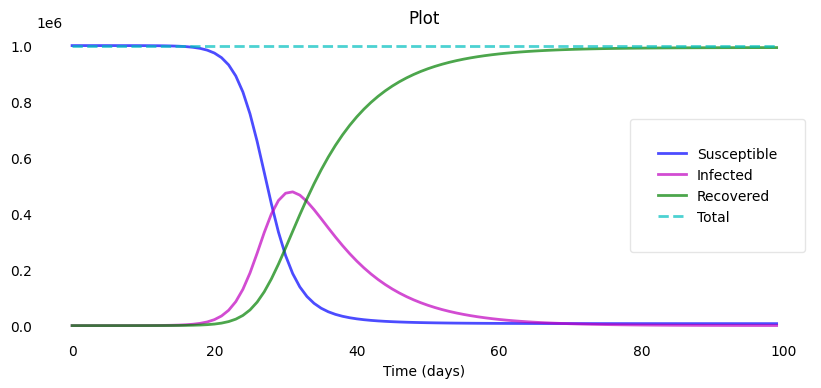

In [ ]:
plotseird(t, S, I, R)

## SEIR


In [ ]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y

    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [ ]:
N = 1_000_000
D = 4.0
gamma = 1.0 / D
delta = 1.0 / 5.0  # inkubacijski period od 5 dana
R_0 = 5.0
beta = R_0 * gamma
S0, E0, I0, R0 = N-1, 1, 0, 0  # početni uvjeti: jedna izložena osoba

In [ ]:
t = np.linspace(0, 149, 150) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

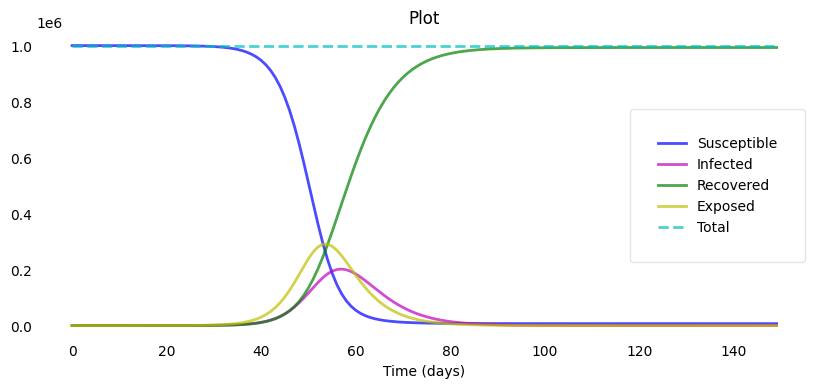

In [ ]:
plotseird(t, S, I, R, E)

## SEIRD

In [ ]:
def deriv(y, t, N, beta, gamma, delta, alpha, mu):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * mu * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * mu * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [ ]:
N = 1_000_000
D = 4.0
gamma = 1.0 / D
delta = 1.0 / 5.0
R_0 = 5.0
beta = R_0 * gamma
alpha = 0.2  # 20% ljudi u modelu umre
mu = 1/5  # stopa smrtnosti
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # početni uvjeti: jedna izložena osoba

In [ ]:
t = np.linspace(0, 99, 100)
y0 = S0, E0, I0, R0, D0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, mu))
S, E, I, R, D = ret.T

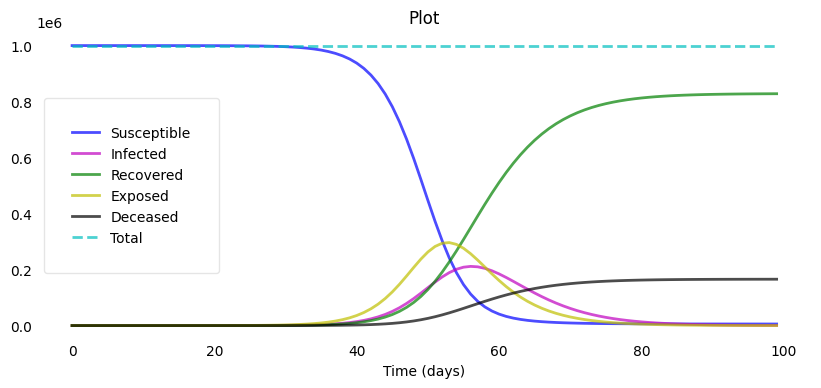

In [ ]:
plotseird(t, S, I, R, E, D)

## Time-Dependent $R_{0}$

### Lockdown

In [ ]:
def deriv(y, t, N, beta, gamma, delta, alpha, mu):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * mu * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * mu * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [ ]:
N = 1_000_000
D = 4.0
gamma = 1.0 / D
delta = 1.0 / 5.0

L = 50 # dana za početak lockdown-a

def R_0(t): # vremenski ovisni R0
    return 5.0 if t < L else 0.9

def beta(t): # vremenski ovisni R0 povlači vremenski ovisnu betu
    return R_0(t) * gamma

alpha = 0.2
mu = 1/9
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # početni uvjeti: jedna izložena osoba

In [ ]:
t = np.linspace(0, 149, 150) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, mu))
S, E, I, R, D = ret.T

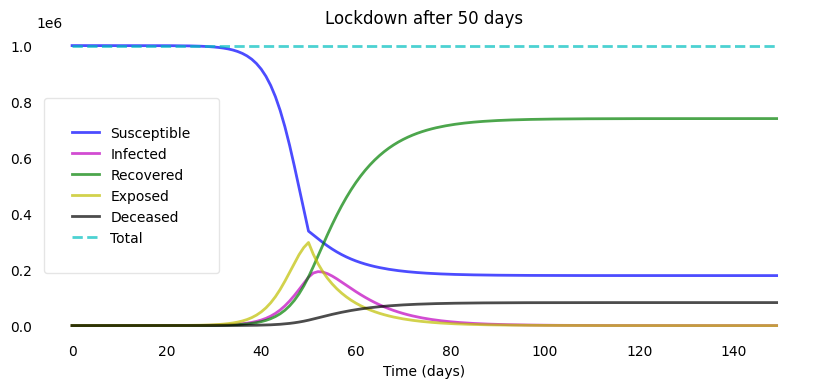

In [ ]:
plotseird(t, S, I, R, E, D, L)

### Advanced Approach: logistic $R_{0}$

In [ ]:
def deriv(y, t, N, beta, gamma, delta, alpha, mu):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * mu * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * mu * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [ ]:
N = 1_000_000
D = 4.0
gamma = 1.0 / D
delta = 1.0 / 5.0

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5

def logistic_R_0(t): # logistično R0
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t): # logistično R0 povlači logistično beta
    return logistic_R_0(t) * gamma

alpha = 0.2
mu = 1/9
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # početni uvjeti: jedna izložena osoba

In [ ]:
t = np.linspace(0, 99, 100)
y0 = S0, E0, I0, R0, D0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, mu))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values

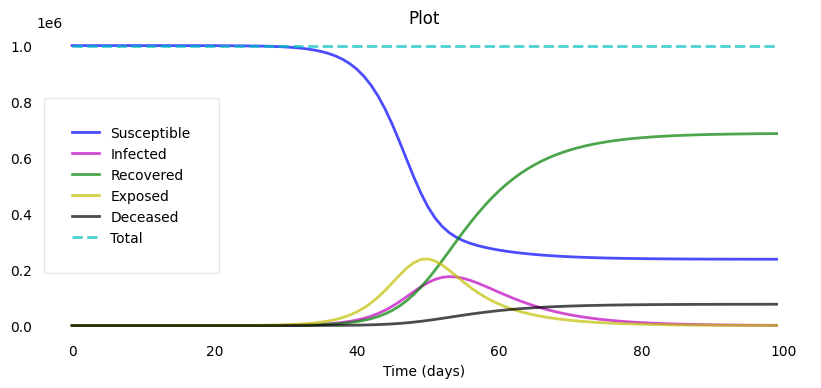

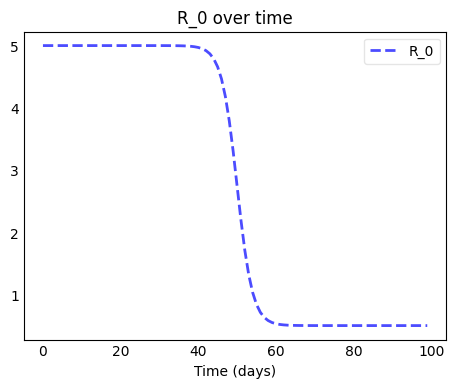

In [ ]:
plotseird(t, S, I, R, E, D, R0=R0_over_time)

### Resource- and Age-Dependent Fatality Rate

In [ ]:
def deriv(y, t, N, beta, gamma, delta, alpha_opt, mu):
    S, E, I, R, D = y

    def alpha(t):
        return s * I/N + alpha_opt

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha(t)) * gamma * I - alpha(t) * mu * I
    dRdt = (1 - alpha(t)) * gamma * I
    dDdt = alpha(t) * mu * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [ ]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 1

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

s = 0.01

mu = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [ ]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha_opt, mu))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

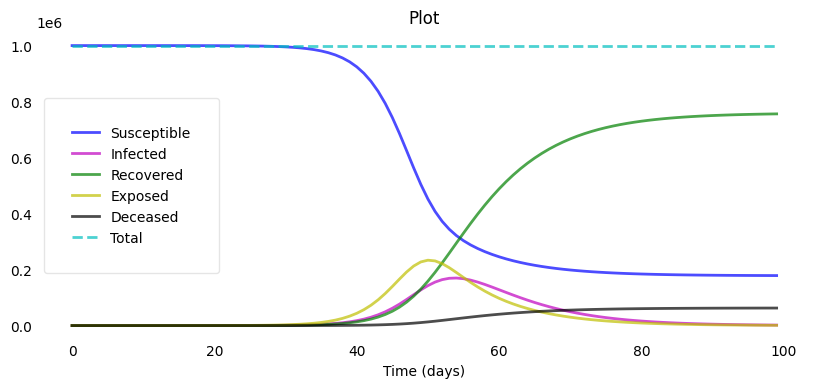

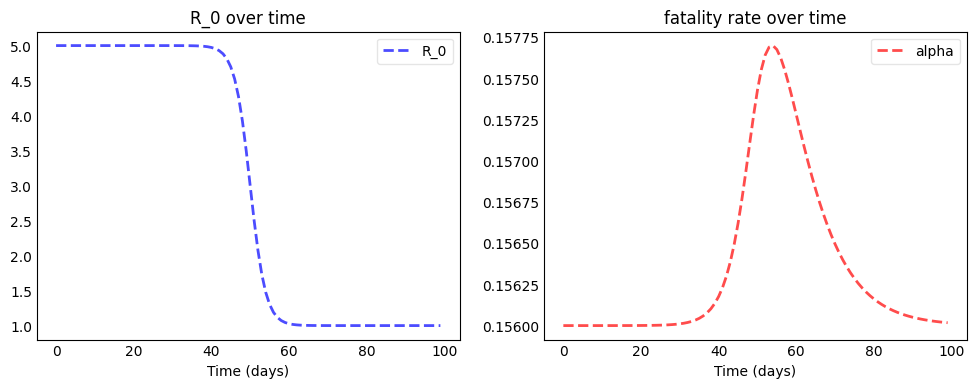

In [ ]:
plotseird(t, S, I, R, E, D, R0=R0_over_time, Alpha=Alpha_over_time)

# Gender

In [ ]:
def deriv(y, t, N, beta, gamma_opt, delta, alpha_opt, mu):
    S, E, I, R, D = y

    def alpha(t):
        return s * I/N + alpha_opt

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha(t)) * gamma_opt * I - alpha(t) * mu * I
    dRdt = (1 - alpha(t)) * gamma_opt * I
    dDdt = alpha(t) * mu * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [ ]:
N = 1_000_000
D = 4.0 # infections lasts four days
delta = 1.0 / 5.0  # incubation period of five days

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 1

gamma_by_gender = {"male": 1.0 / D, "female": 2.0 / D}
proportion_by_gender = {"male": 0.504, "female": 0.496}
gamma_opt = sum(gamma_by_gender[i] * proportion_by_gender[i] for i in list(gamma_by_gender.keys()))

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma_opt

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

s = 0.01

mu = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [ ]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma_opt, delta, alpha_opt, mu))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

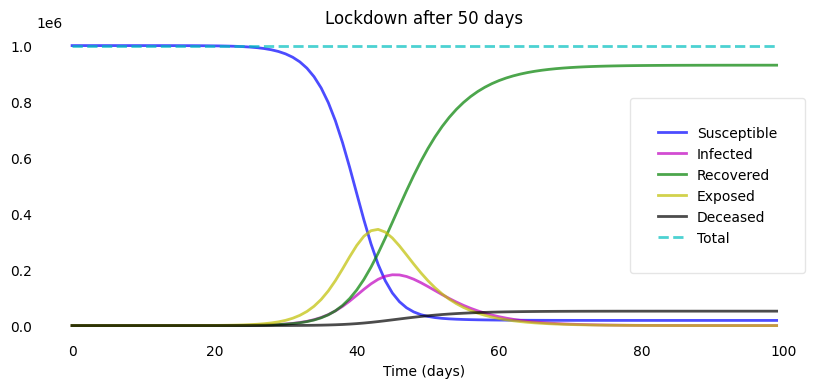

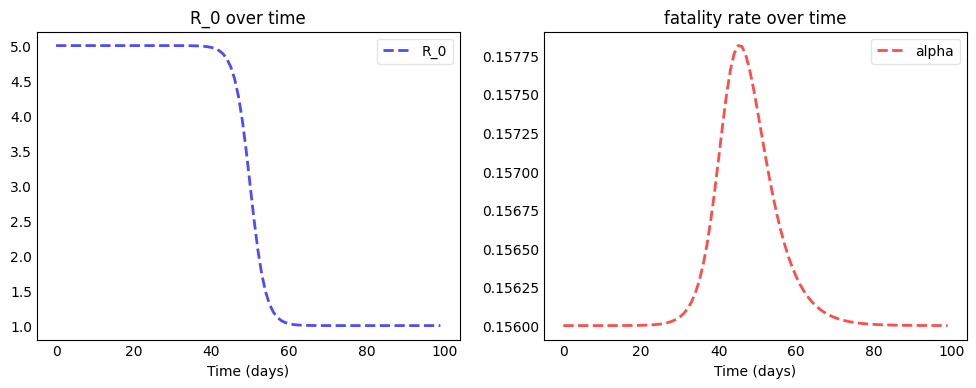

In [ ]:
plotseird(t, S, I, R, E, D, L, R0=R0_over_time, Alpha=Alpha_over_time)

# Critical state (SEIRDC)

In [ ]:
def deriv(y, t, N, beta, gamma_opt, delta, alpha_opt, mu, tau, phi, zeta_opt):
    S, E, I, R, D, C = y

    def zeta(t):
        return 10 * s * C/N + zeta_opt

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha_opt) * gamma_opt * I - alpha_opt * tau * I
    dRdt = (1 - alpha_opt) * gamma_opt * I + (1 - zeta(t)) * phi * C
    dCdt = alpha_opt * tau * I - (1 - zeta(t)) * phi * C - zeta(t) * mu * C
    dDdt = zeta(t) * mu * C
    return dSdt, dEdt, dIdt, dRdt, dDdt, dCdt

In [ ]:
N = 1_000_000
D = 8.0
delta = 1.0 / 5.0
zeta_opt = 0.80
mu = 1/9  # dana iz stanja C u stanje D
tau = 1/7  # dana iz stanja I u stanje C
phi = 1/10  # dana iz stanja C u stanje R
s = 0.01
L=None

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 1

gamma_by_gender = {"male": 1.0 / D, "female": 2 / D}
proportion_by_gender = {"male": 0.504, "female": 0.496}
gamma_opt = sum(gamma_by_gender[i] * proportion_by_gender[i] for i in list(gamma_by_gender.keys()))

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma_opt

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

S0, E0, I0, R0, D0, C0 = N-1, 1, 0, 0, 0, 0  # početni uvjeti: jedna izložena osoba

In [ ]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, C0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma_opt, delta, alpha_opt, mu, tau, phi, zeta_opt))
S, E, I, R, D, C = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Zeta_over_time = [10 * s * C[i]/N + zeta_opt for i in range(len(t))]  # to plot zeta over time
Alpha_over_time = [alpha_opt for i in range(len(t))]

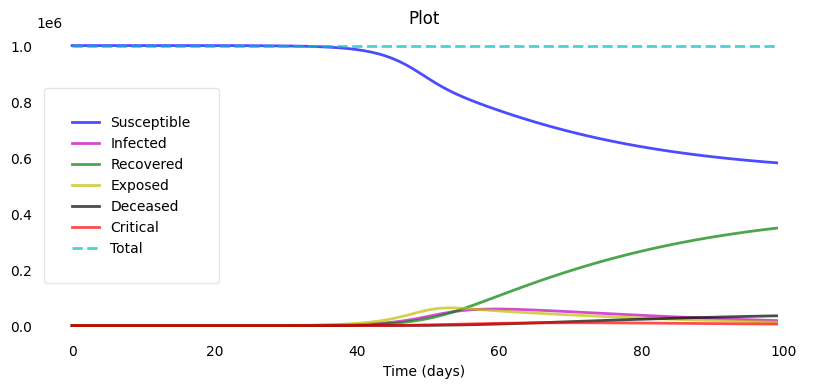

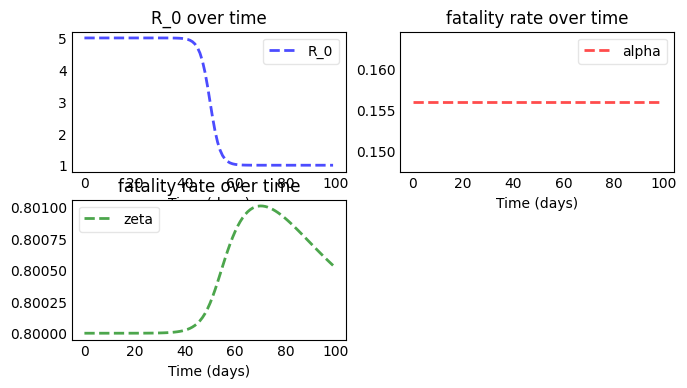

In [ ]:
plotseird(t, S, I, R, E, D, L, C, R0=R0_over_time, Alpha=Alpha_over_time, Zeta=Zeta_over_time)

# Available beds

In [ ]:
def deriv(y, t, N, beta, gamma_opt, delta, alpha_opt, mu, tau, phi, zeta_opt, N_beds0):
    S, E, I, R, D, C = y

    def beds(t):
        return s * t * N_beds0 + N_beds0

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha_opt) * gamma_opt * I - alpha_opt * tau * I
    if C <= beds(t):
      dRdt = (1 - alpha_opt) * gamma_opt * I + (1 - zeta_opt) * phi * C
    else:
      dRdt = (1 - alpha_opt) * gamma_opt * I + (1 - zeta_opt) * phi * beds(t)
    if C <= beds(t):
      dCdt = alpha_opt * tau * I - (1 - zeta_opt) * phi * C - zeta_opt * mu * C
    else:
      dCdt = alpha_opt * tau * I - (1 - zeta_opt) * phi * beds(t) - zeta_opt * mu * C - (C - beds(t))
    if C <= beds(t):
      dDdt = zeta_opt * mu * C
    else:
      dDdt = zeta_opt * mu * C + (C - beds(t))

    return dSdt, dEdt, dIdt, dRdt, dDdt, dCdt

In [ ]:
N = 1_000_000
D = 8.0
delta = 1.0 / 5.0
zeta_opt = 0.80
N_beds0 = 100 # broj kreveta na početku

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 1

gamma_by_gender = {"male": 1.0 / D, "female": 2 / D}
proportion_by_gender = {"male": 0.504, "female": 0.496}
gamma_opt = sum(gamma_by_gender[i] * proportion_by_gender[i] for i in list(gamma_by_gender.keys()))

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

mu = 1/9
tau = 1/7
phi = 1/10
S0, E0, I0, R0, D0, C0 = N-1, 1, 0, 0, 0, 0  # početni uvjeti: jedna izložena osoba

L=None

In [ ]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, C0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma_opt, delta, alpha_opt, mu, tau, phi, zeta_opt, N_beds0))
S, E, I, R, D, C = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Beds_over_time = [s * t * N_beds0 + N_beds0 for t in range(len(t))]
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time
Zeta_over_time = [10 * s * C[i]/N + zeta_opt for i in range(len(t))]

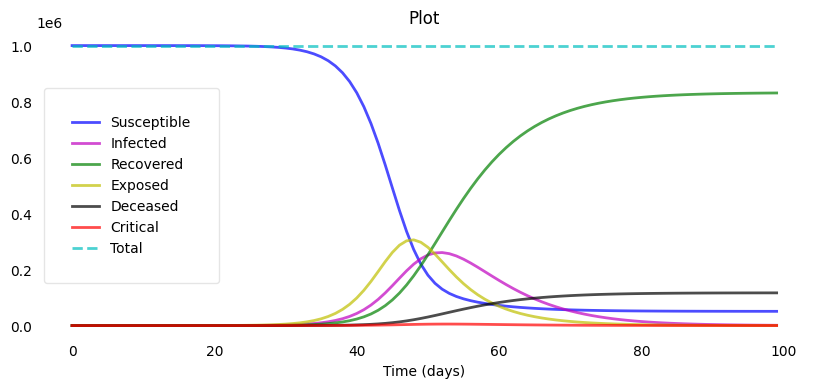

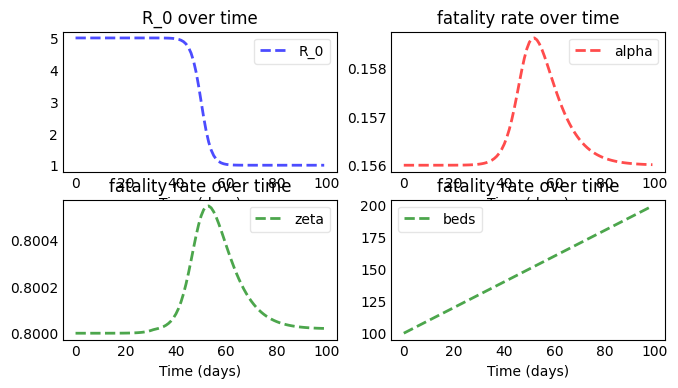

In [ ]:
plotseird(t, S, I, R, E, D, L, C, R0=R0_over_time, Alpha=Alpha_over_time, Zeta=Zeta_over_time, Beds=Beds_over_time)

# Quarantine state (SEIRDCQ)

In [ ]:
def deriv(y, t, N, beta, gamma_opt, delta, alpha_opt, mu, zeta_opt, tau, phi, N_beds0, q_perc, q_time, q_crit, q_time_crit, q_time_rec):
    S, E, I, R, D, C, Q = y

    def beds(t):
        return s * t * N_beds0 + N_beds0

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - (q_perc + (1 - q_perc) * alpha_opt)) * gamma_opt * I - alpha_opt * (1 - q_perc) * tau * I - q_perc * q_time * I
    dQdt = q_perc * q_time * I - q_crit * q_time_crit * Q - (1 - q_crit) * q_time_rec * Q
    if C <= beds(t):
      dRdt = (1 - (q_perc + (1 - q_perc) * alpha_opt)) * gamma_opt * I + (1-zeta_opt) * phi * C + (1-q_crit) * q_time_rec * Q
    else:
      dRdt = (1 - (q_perc + (1 - q_perc) * alpha_opt)) * gamma_opt * I + (1-zeta_opt) * phi * beds(t) + (1-q_crit) * q_time_rec * Q
    if C <= beds(t):
      dCdt = alpha_opt * (1 - q_perc) * tau * I + q_crit * q_time_crit * Q - (1-zeta_opt) * phi * C - zeta_opt * mu * C
    else:
      dCdt = alpha_opt * (1 - q_perc) * tau * I + q_crit * q_time_crit * Q - (1-zeta_opt) * phi * beds(t) - zeta_opt * mu * C - (C - beds(t))
    if C <= beds(t):
      dDdt = zeta_opt * mu * C
    else:
      dDdt = zeta_opt * mu * C + (C - beds(t))
    return dSdt, dEdt, dIdt, dRdt, dDdt, dCdt, dQdt

In [ ]:
N = 1_000_000
D = 14.0
delta = 1.0 / 7.0
zeta_opt = 0.80
N_beds0 = 100
q_perc = 0.5
q_crit = 0.09

R_0_start, k, x0, R_0_end = 5.0, 0.5, 250, 1

gamma_by_gender = {"male": 1.0 / D, "female": 0.5 / D}
proportion_by_gender = {"male": 0.504, "female": 0.496}
gamma_opt = sum(gamma_by_gender[i] * proportion_by_gender[i] for i in list(gamma_by_gender.keys()))

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma_opt

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
s = 0.01
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

mu = 1/5
tau = 1/7
phi = 1/10
q_time = 1/5
q_time_crit = 1/5
q_time_rec = 1/7

S0, E0, I0, R0, D0, C0, Q0 = N-1, 1, 0, 0, 0, 0, 0  # početni uvjeti: jedna izložena osoba

L = None

In [ ]:
t = np.linspace(0, 499, 500) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, C0, Q0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma_opt, delta, alpha_opt, mu, zeta_opt, tau, phi, N_beds0, q_perc, q_time, q_crit, q_time_crit, q_time_rec))
S, E, I, R, D, C, Q = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

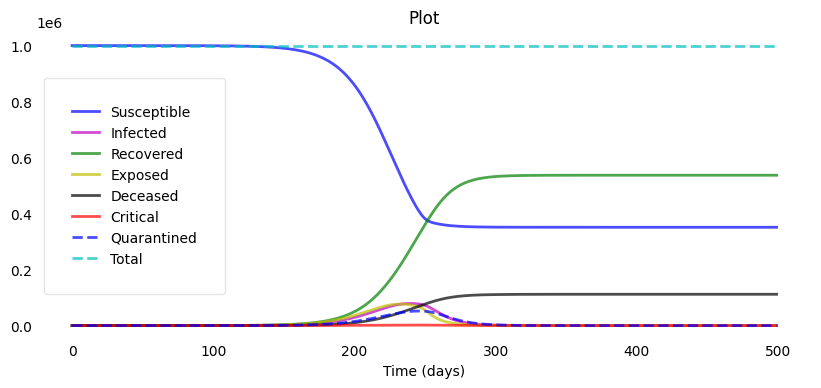

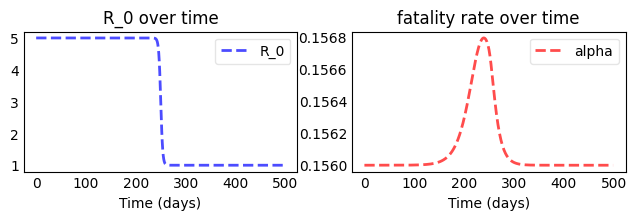

In [ ]:
plotseird(t, S, I, R, E, D, L, C, Q, R0=R0_over_time, Alpha=Alpha_over_time)

# Cyclical model (SEIRDCQS)

In [ ]:
def deriv(y, t, N, beta, gamma_opt, delta, alpha_opt, mu, zeta_opt, tau, phi, N_beds0, q_perc, q_time, q_crit, q_time_crit, q_time_rec, rec_sus):
    S, E, I, R, D, C, Q = y

    def beds(t):
        return s * t * N_beds0 + N_beds0

    dSdt = -beta(t) * S * I / N + rec_sus * R
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - (q_perc + (1 - q_perc) * alpha_opt)) * gamma_opt * I - alpha_opt * (1 - q_perc) * tau * I - q_perc * q_time * I
    dQdt = q_perc * q_time * I - q_crit * q_time_crit * Q - (1 - q_crit) * q_time_rec * Q
    if C <= beds(t):
      dRdt = (1 - (q_perc + (1 - q_perc) * alpha_opt)) * gamma_opt * I + (1-zeta_opt) * phi * C + (1-q_crit) * q_time_rec * Q - rec_sus * R
    else:
      dRdt = (1 - (q_perc + (1 - q_perc) * alpha_opt)) * gamma_opt * I + (1-zeta_opt) * phi * beds(t) + (1-q_crit) * q_time_rec * Q - rec_sus * R
    if C <= beds(t):
      dCdt = alpha_opt * (1 - q_perc) * tau * I + q_crit * q_time_crit * Q - (1-zeta_opt) * phi * C - zeta_opt * mu * C
    else:
      dCdt = alpha_opt * (1 - q_perc) * tau * I + q_crit * q_time_crit * Q - (1-zeta_opt) * phi * C - zeta_opt * mu * C - (C - beds(t))
    if C <= beds(t):
      dDdt = zeta_opt * mu * C
    else:
      dDdt = zeta_opt * mu * C + (C - beds(t))
    return dSdt, dEdt, dIdt, dRdt, dDdt, dCdt, dQdt

In [ ]:
N = 1_000_000
D = 14.0
delta = 1.0 / 7.0
zeta_opt = 0.80
N_beds0 = 100
q_perc = 0.5
q_crit = 0.09
rec_sus = 1/30 # dana za ponovnu podložnost

R_0_start, k, x0, R_0_end = 5.0, 0.5, 400, 1

gamma_by_gender = {"male": 1.0 / D, "female": 0.5 / D}
proportion_by_gender = {"male": 0.504, "female": 0.496}
gamma_opt = sum(gamma_by_gender[i] * proportion_by_gender[i] for i in list(gamma_by_gender.keys()))

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma_opt

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
s = 0.01
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

mu = 1/5
tau = 1/7
phi = 1/10
q_time = 1/5
q_time_crit = 1/5
q_time_rec = 1/7

S0, E0, I0, R0, D0, C0, Q0 = N-1, 1, 0, 0, 0, 0, 0  # početni uvjeti: jedna izložena osoba

L=None

In [ ]:
t = np.linspace(0, 999, 1000) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, C0, Q0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma_opt, delta, alpha_opt, mu, zeta_opt, tau, phi, N_beds0, q_perc, q_time, q_crit, q_time_crit, q_time_rec, rec_sus))
S, E, I, R, D, C, Q = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

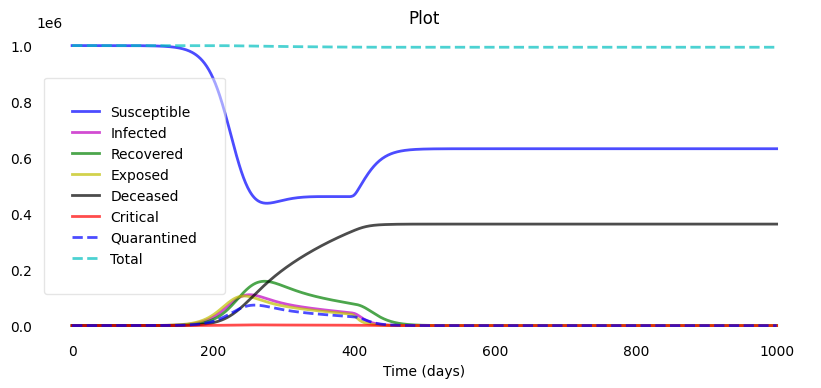

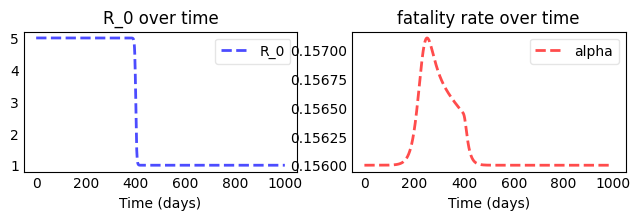

In [ ]:
plotseird(t, S, I, R, E, D, L, C, Q, R0=R0_over_time, Alpha=Alpha_over_time)